In this project the dataset includes top 1924 companies globally based on sales, profits, assets, market value as of 2020. 

Aim of this project:
- To find top companies based on sales, profits, assets and market value and finding patterns 
- Does region (country or continent) of the company have impact on the rank and other values

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tabulate import tabulate

In [4]:
data = pd.read_csv('Top2000CompaniesGlobally.csv')
data.head()

,Global Rank,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent,Latitude,Longitude
0,1,ICBC,134.8,37.8,2813.5,237.3,China,Asia,35.86166,104.195397
1,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia,35.86166,104.195397
2,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America,37.09024,-95.712891
3,4,General Electric,147.4,13.6,685.3,243.7,USA,North America,37.09024,-95.712891
4,5,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America,37.09024,-95.712891


In [5]:
data = data.drop(columns=["Global Rank","Latitude", "Longitude"])
data.head()

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent
0,ICBC,134.8,37.8,2813.5,237.3,China,Asia
1,China Construction Bank,113.1,30.6,2241.0,202.0,China,Asia
2,JPMorgan Chase,108.2,21.3,2359.1,191.4,USA,North America
3,General Electric,147.4,13.6,685.3,243.7,USA,North America
4,Exxon Mobil,420.7,44.9,333.8,400.4,USA,North America


In [6]:
len(data.index)

1924

In [7]:
data.tail()

,Company,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion),Country,Continent
1919,Tractor Supply,4.7,0.3,1.7,7.1,USA,North America
1920,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,Asia
1921,UOL Group,0.9,0.7,7.8,4.2,Singapore,Asia
1922,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,South America
1923,Old Republic International,5.0,-0.1,16.2,3.3,USA,North America


#### Distribution of companies based on continents

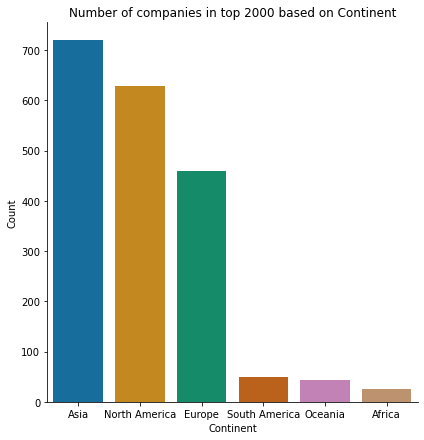

In [8]:
plot = sns.catplot(data=data,x="Continent",kind="count", palette="colorblind", height=6)
plot.set(xlabel ="Continent", ylabel = "Count", title ="Number of companies in top 2000 based on Continent")

In [9]:
(data["Continent"].value_counts()/len(data))*100

Asia             37.370062
North America    32.692308
Europe           23.856549
South America     2.546778
Oceania           2.234927
Africa            1.299376
Name: Continent, dtype: float64

Inferences:
- Asia has the highest number of companies (37%) in the top 2000 
- North America follows Asia with around 33% of companies in the list
- Africa has the least number of companies in the top 2000 

In [10]:
(data[["Continent","Country"]].groupby(["Continent","Country"]).size()/len(data))*100

Continent      Country             
Africa         Egypt                    0.103950
               Liberia                  0.051975
               Morocco                  0.103950
               Nigeria                  0.051975
               South Africa             0.987526
Asia           China                    7.016632
               Hong Kong                2.390852
               India                    2.910603
               Indonesia                0.467775
               Israel                   0.519751
               Japan                   12.785863
               Jordan                   0.051975
               Kuwait                   0.207900
               Lebanon                  0.103950
               Malaysia                 1.039501
               Oman                     0.051975
               Pakistan                 0.051975
               Philippines              0.415800
               Qatar                    0.415800
               Saudi Arabia      

Inferences:
- The USA has highest number of companies in the list with approximately 28% 
- They are followed by Japan with 13% and then China with 7%
- Asia and Europe have most countries listed
- For each continent:
    - Africa - South Africa (1%)
    - Asia - Japan (13%)
    - Europe - UK (5%)
    - North America - USA (27%)
    - Oceania - Australia (2%)
    - South America - Brazil (1.6%)

#### Top 10 companies based on Market Value ($billion)

In [11]:
data.sort_values(by=["Market Value ($billion)"],inplace=True,ascending=False)
data[["Company","Market Value ($billion)","Country","Continent"]].head(10)

,Company,Market Value ($billion),Country,Continent
15,Apple,416.6,USA,North America
4,Exxon Mobil,400.4,USA,North America
65,Google,268.4,USA,North America
8,PetroChina,261.2,China,Asia
9,Berkshire Hathaway,252.8,USA,North America
3,General Electric,243.7,USA,North America
14,Wal-Mart Stores,242.5,USA,North America
32,IBM,239.5,USA,North America
0,ICBC,237.3,China,Asia
39,Microsoft,234.8,USA,North America


Inferences:
- Apple has the highest market value ($\$416$ billions)
- Out of the 10, 8 are based out of the USA and 2 are from China
- PetroChina is has the highest market value for a non-USA based company
- Difference in the market value of Apple and PetroChina is more that $\$150$ billion
- Apple and Exxon Mobil are the only two companies with market value more than $\$400$ billion and the remaining companies fall below the $\$300$ billion mark

#### Top 10 companies based on Sales ($billion)

In [12]:
data.sort_values(by=["Sales ($billion)"],inplace=True,ascending=False)
data[["Company","Sales ($billion)","Country","Continent"]].head(10)

,Company,Sales ($billion),Country,Continent
14,Wal-Mart Stores,469.2,USA,North America
6,Royal Dutch Shell,467.2,The Netherlands,Europe
4,Exxon Mobil,420.7,USA,North America
25,Sinopec-China Petroleum,411.7,China,Asia
17,BP,370.9,UK,Europe
8,PetroChina,308.9,China,Asia
13,Volkswagen Group,254.0,Germany,Europe
22,Total,240.5,France,Europe
30,Toyota Motor,224.5,Japan,Asia
12,Chevron,222.6,USA,North America


Inferences:
- The company with the highest sales (Walmart Stores) is again from the USA
- Among the top 10, three are headquartered in the USA, two originate from China, and the remaining five, hailing from The Netherlands, UK, Germany, France, and Japan, each have one representation in the list.
- Only Exxon Mobil from the USA is in both the lists of Top 10 based on Market Value and Sales
- Among the companies, 4 generate sales surpassing $\$400$ billion, 2 companies record sales within the range of $\$300$ to $\$400$ billion, and the remaining 4 companies achieve sales in the range of $\$200$ to $\$300$ billion.

#### Top 10 companies based on Profits ($billion)

In [13]:
data.sort_values(by=["Profits ($billion)"],inplace=True,ascending=False)
data[["Company","Profits ($billion)","Country","Continent"]].head(10)

,Company,Profits ($billion),Country,Continent
4,Exxon Mobil,44.9,USA,North America
15,Apple,41.7,USA,North America
16,Gazprom,40.6,Russia,Europe
0,ICBC,37.8,China,Asia
1,China Construction Bank,30.6,China,Asia
13,Volkswagen Group,28.6,Germany,Europe
6,Royal Dutch Shell,26.6,The Netherlands,Europe
12,Chevron,26.2,USA,North America
7,Agricultural Bank of China,23.0,China,Asia
10,Bank of China,22.1,China,Asia


Inferences:
- Exxon Mobil from the USA is on top of the list with approximately $\$45$ billion in profit
- In the list of the top 10, there are three companies based in the USA, four that have their origins in China, and the remaining three, which come from The Netherlands, Germany, and Russia, each have one spot on the list.
- Among the companies, 3 generate sales surpassing $\$40$ billion, 2 companies record sales within the range of $\$30$ to $\$40$ billion, and the remaining 5 companies achieve sales in the range of $\$20$ to $\$30$ billion.

#### Top 10 companies based on Assets ($billion)

In [14]:
data.sort_values(by=["Assets ($billion)"],inplace=True,ascending=False)
data[["Company","Assets ($billion)","Country","Continent"]].head(10)

,Company,Assets ($billion),Country,Continent
349,Fannie Mae,3226.2,USA,North America
0,ICBC,2813.5,China,Asia
5,HSBC Holdings,2684.1,UK,Europe
26,Mitsubishi UFJ Financial,2653.1,Japan,Asia
290,Deutsche Bank,2652.6,Germany,Europe
21,BNP Paribas,2504.2,France,Europe
440,Crédit Agricole,2431.4,France,Europe
384,Barclays,2422.5,UK,Europe
2,JPMorgan Chase,2359.1,USA,North America
1,China Construction Bank,2241.0,China,Asia


- Fannie Mae from the USA is on top of the list with $\$3226$ billions in assets
- In the list of the top 10, there are two companies based in the USA, two that have their origins in China, two are from France, two from UK and the remaining two, which come from Japan, and Germany each have one spot on the list.
- Only Fannie Mae surpass the $\$3000$ billion mark while the subsequent company on the list, China's ICBC, possesses assets $\$200$ billion lower.

#### Analysis of Market Value

<AxesSubplot:xlabel='Market Value ($billion)', ylabel='Count'>

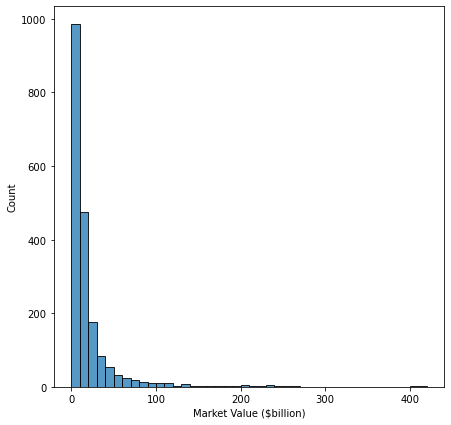

In [71]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data=data,x="Market Value ($billion)",bins=44,binwidth=10)

In [75]:
data["Market Value ($billion)"].describe()

count    1924.000000
mean       19.558160
std        32.957023
min         0.000000
25%         5.300000
50%         9.600000
75%        19.200000
max       416.600000
Name: Market Value ($billion), dtype: float64

<AxesSubplot:xlabel='Market Value ($billion)', ylabel='Continent'>

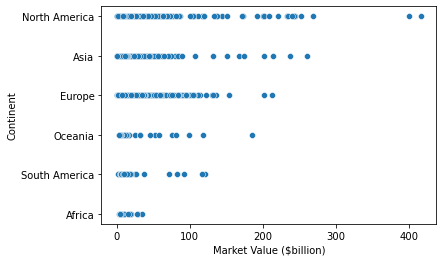

In [83]:
sns.scatterplot(data=data,y="Continent",x="Market Value ($billion)")

Inferences:
- Mean value for market value is $\$19$ billions and median is $\$9.6$ billions
- Majority of the companies in the list have market value less than $\$100$ billions 
- Spread of market value in North America is high compared others and spread for African companies is the smallest

#### Analysis of Sales

<AxesSubplot:xlabel='Sales ($billion)', ylabel='Count'>

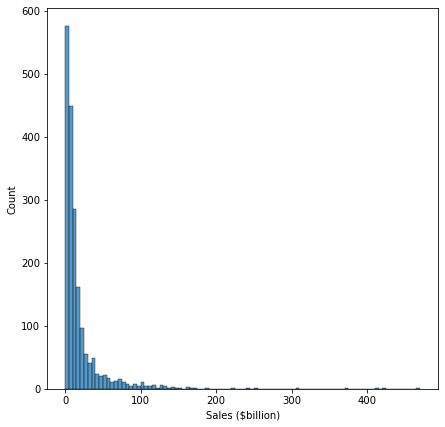

In [72]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data=data,x="Sales ($billion)",bins=44,binwidth=5)

<AxesSubplot:xlabel='Sales ($billion)', ylabel='Continent'>

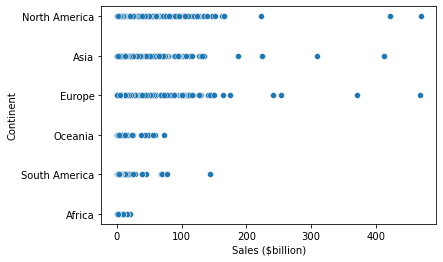

In [87]:
sns.scatterplot(data=data,y="Continent",x="Sales ($billion)")

In [77]:
data["Sales ($billion)"].describe()

count    1924.000000
mean       19.265904
std        34.683911
min         0.000000
25%         4.100000
50%         9.000000
75%        18.425000
max       469.200000
Name: Sales ($billion), dtype: float64

Inferences:
- Mean value for sales is $\$19$ billions and median is $\$9$ billions
- Majority of the companies have sales less than $\$100$ billions
- Spread for the North American, Asian and European is high compared to the rest three 

#### Analysis of Profits

<AxesSubplot:xlabel='Profits ($billion)', ylabel='Count'>

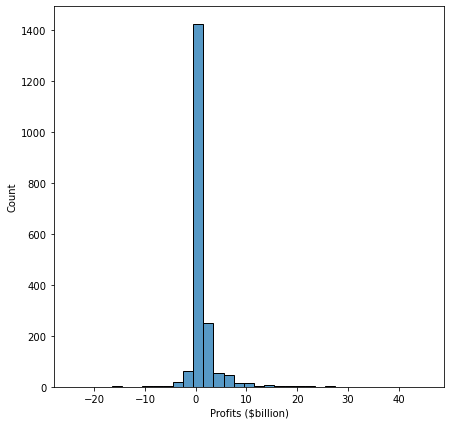

In [73]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data=data,x="Profits ($billion)",bins=44,binwidth=2)

In [78]:
data["Profits ($billion)"].describe()

count    1924.000000
mean        1.226040
std         3.413831
min       -24.500000
25%         0.300000
50%         0.600000
75%         1.200000
max        44.900000
Name: Profits ($billion), dtype: float64

<AxesSubplot:xlabel='Profits ($billion)', ylabel='Continent'>

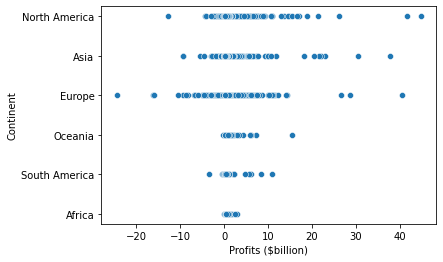

In [88]:
sns.scatterplot(data=data,y="Continent",x="Profits ($billion)")

Inferences:
- Mean value for profits is $\$1$ billion and median is $\$0.6$ billion
- Majority of the companies have profits less than $\$10$ billions
- Spread for the North American, Asian and European is high compared to the rest three 

#### Analysis of Assets

<AxesSubplot:xlabel='Assets ($billion)', ylabel='Count'>

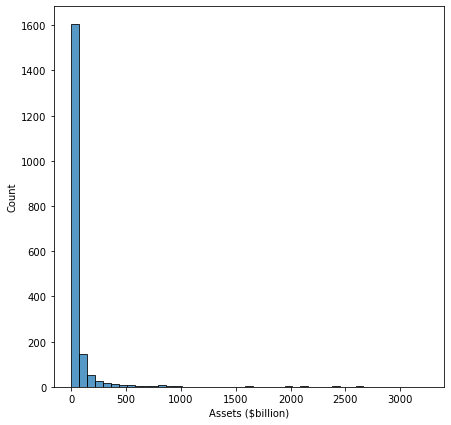

In [74]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data=data,x="Assets ($billion)",bins=44,binwidth=72)

In [79]:
data["Assets ($billion)"].describe()

count    1924.000000
mean       79.507796
std       261.098775
min         1.000000
25%         9.675000
50%        19.250000
75%        45.800000
max      3226.200000
Name: Assets ($billion), dtype: float64

<AxesSubplot:xlabel='Assets ($billion)', ylabel='Continent'>

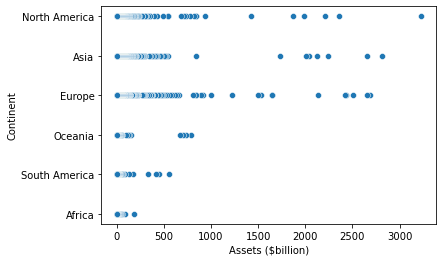

In [89]:
sns.scatterplot(data=data,y="Continent",x="Assets ($billion)")

Inferences:
- Mean value for assets is $\$79$ billions and median is $\$19$ billions
- Majority of the companies have assets less than $\$500$ billions
- Spread for the North American, Asian and European is high compared to the rest three 

#### Correlation matrix for Sales, Profits, Assets and Market Value

In [84]:
data.corr()

,Sales ($billion),Profits ($billion),Assets ($billion),Market Value ($billion)
Sales ($billion),1.000000,0.594174,0.356069,0.649493
Profits ($billion),0.594174,1.000000,0.356553,0.788853
Assets ($billion),0.356069,0.356553,1.000000,0.375544
Market Value ($billion),0.649493,0.788853,0.375544,1.000000


Inferences:
- High positive correlation is observed in Profits vs Market Value (0.79) and Sales vs Market Value (0.65) 